In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stasts

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

Data
Variable	Definition
User_ID	User ID
Product_ID	Product ID
Gender	Sex of User
Age	Age in bins
Occupation	Occupation (Masked)
City_Category	Category of the City (A,B,C)
Stay_In_Current_City_Years	Number of years stay in current city
Marital_Status	Marital Status
Product_Category_1	Product Category (Masked)
Product_Category_2	Product may belongs to other category also (Masked)
Product_Category_3	Product may belongs to other category also (Masked)
Purchase	Purchase Amount (Target Variable)
Your model performance will be evaluated on the basis of your prediction of the purchase amount for the test data (test.csv), which contains similar data-points as train except for their purchase amount.

In [ ]:
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns=None

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/train.csv')
test=pd.read_csv('/content/drive/MyDrive/test.csv')
train.shape,test.shape

((550068, 12), (233599, 11))

In [ ]:
combined=pd.concat([train,test],ignore_index=True)
combined.shape

(783667, 12)

In [ ]:
combined.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [ ]:
combined.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
User_ID,783667.0,NaN,NaN,NaN,1003028.995753,1727.266668,1000001.0,1001519.0,1003075.0,1004478.0,1006040.0
Product_ID,783667,3677,P00265242,2709,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,783667,2,M,590031,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,783667,7,26-35,313015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,783667.0,NaN,NaN,NaN,8.0793,6.522206,0.0,2.0,7.0,14.0,20.0
City_Category,783667,3,B,329739,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stay_In_Current_City_Years,783667,5,1,276425,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,783667.0,NaN,NaN,NaN,0.409777,0.491793,0.0,0.0,0.0,1.0,1.0
Product_Category_1,783667.0,NaN,NaN,NaN,5.366196,3.87816,1.0,1.0,5.0,8.0,20.0
Product_Category_2,537685.0,NaN,NaN,NaN,9.844506,5.089093,2.0,5.0,9.0,15.0,18.0


In [ ]:
combined.isnull().sum()/len(combined)*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.388587
Product_Category_3            69.648078
Purchase                      29.808452
dtype: float64

In [ ]:
miss=combined.isnull().sum()
per=combined.isnull().sum()/len(combined)*100
DataFrame({'miss':miss,'per':per})

,miss,per
User_ID,0,0.000000
Product_ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
City_Category,0,0.000000
Stay_In_Current_City_Years,0,0.000000
Marital_Status,0,0.000000
Product_Category_1,0,0.000000
Product_Category_2,245982,31.388587


<Figure size 1440x1440 with 0 Axes>

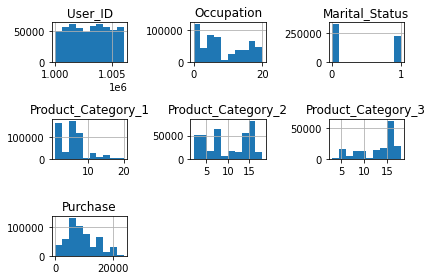

In [ ]:
plt.figure(figsize=[20,20])
train.hist()
plt.tight_layout()

In [ ]:
num_col=combined.select_dtypes(include=np.number).columns
cat_col=combined.select_dtypes(exclude=np.number).columns

In [ ]:
# fixing martial statsus
combined['Marital_Status']=combined['Marital_Status'].astype(object)

In [ ]:
cat_col

Index(['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years'],
      dtype='object')

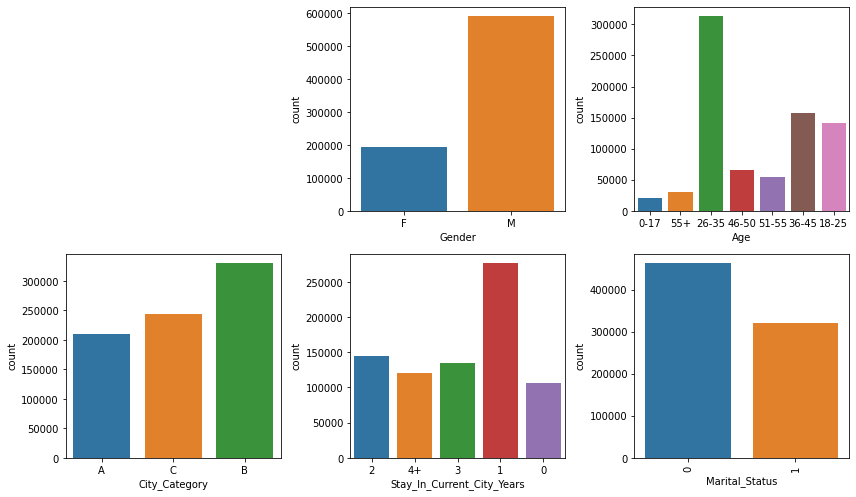

In [ ]:
a=3
b=3
c=2
plt.figure(figsize=[12,10])
for i in ['Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status']:
  plt.subplot(a,b,c)
  sns.countplot(combined.loc[:,i])
  plt.xlabel(i)
  c=c+1
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()



In [ ]:
# removing the special character
combined.Stay_In_Current_City_Years=combined.Stay_In_Current_City_Years.str.strip('+').astype('float')

In [ ]:
combined.Age=combined.Age.str.strip('+')

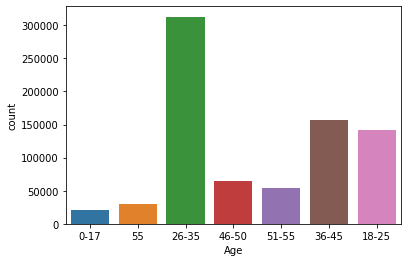

In [ ]:
sns.countplot(combined.Age)

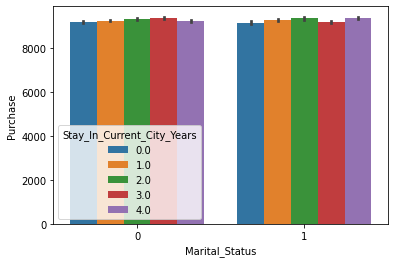

In [ ]:
sns.barplot(combined.Marital_Status,combined.Purchase,hue=combined.Stay_In_Current_City_Years)

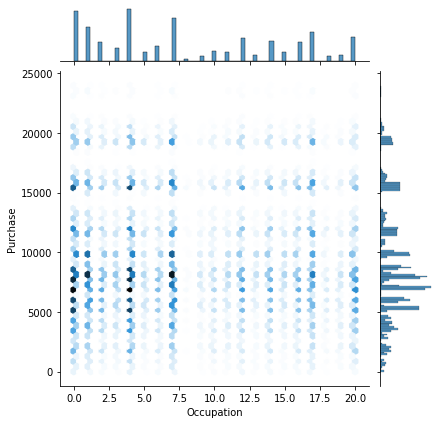

In [ ]:
sns.jointplot(combined.Occupation,combined.Purchase,kind='hex')

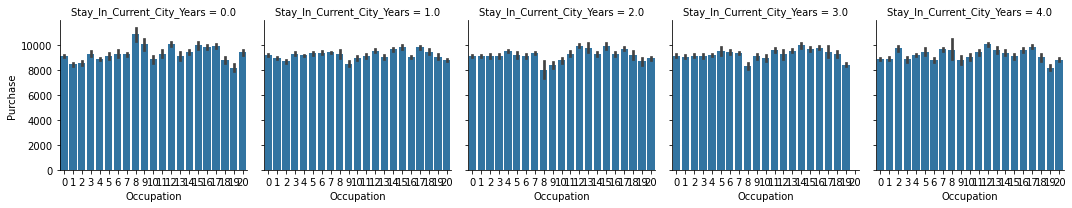

In [ ]:
g = sns.FacetGrid(combined, col = "Stay_In_Current_City_Years")
g.map(sns.barplot, "Occupation", "Purchase")
plt.show()


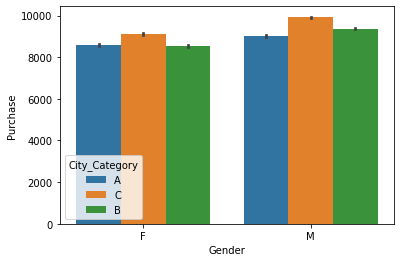

In [ ]:
sns.barplot(combined.Gender,combined.Purchase,hue=combined.City_Category)

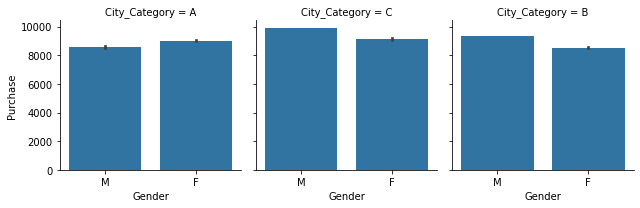

In [ ]:
g = sns.FacetGrid(combined, col = "City_Category")
g.map(sns.barplot, "Gender", "Purchase")
plt.show()

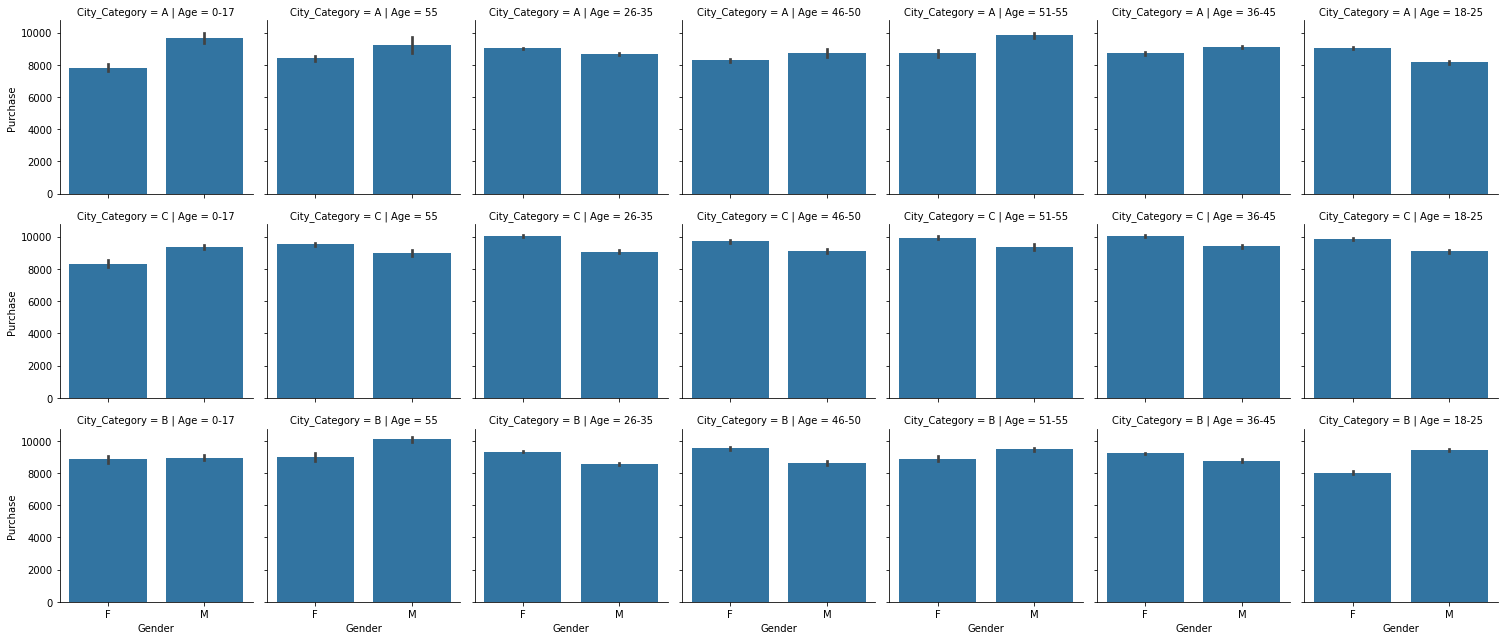

In [ ]:
g = sns.FacetGrid(combined, row = "City_Category",col='Age')
g.map(sns.barplot, "Gender", "Purchase")
plt.show()

In [ ]:
combined.Product_Category_1.describe()

count    783667.000000
mean          5.366196
std           3.878160
min           1.000000
25%           1.000000
50%           5.000000
75%           8.000000
max          20.000000
Name: Product_Category_1, dtype: float64

In [ ]:
# Impute the Missing Values in Prod_Cat_2

# City Condition
ca = combined.City_Category=="A"
cb = combined.City_Category=="B"
cc = combined.City_Category=="C"


# Gender
c_m = combined.Gender=="M"
c_f = combined.Gender=="F"

combined.loc[(ca) & (c_m) &(combined["Product_Category_2"].isnull()), 
             "Product_Category_2"] = 9.0

combined.loc[(ca) & (c_f) &(combined["Product_Category_2"].isnull()), 
             "Product_Category_2"]=11.0
combined.loc[(cb) & (c_m) &(combined["Product_Category_2"].isnull()),
             "Product_Category_2"]=9.0

combined.loc[(cb) & (c_f)&(combined["Product_Category_2"].isnull()),
             "Product_Category_2"]=10.0

combined.loc[(cc) & (c_m)&(combined["Product_Category_2"].isnull()),
             "Product_Category_2"]=9.0
combined.loc[(cc) & (c_f)&(combined["Product_Category_2"].isnull()),
             "Product_Category_2"]=10.0


In [ ]:
# Imputate the missing value in catergory 2
ca=combined.City_Category=='A'
cb=combined.City_Category=='B'
cc=combined.City_Category=='C'

# Gender
c_m=combined.Gender=='M'
c_f=combined.Gender=='F'

combined.loc[(ca) & (c_m) &(combined["Product_Category_3"].isnull()), 
             "Product_Category_3"] = 15.0

combined.loc[(ca) & (c_f) &(combined["Product_Category_3"].isnull()), 
             "Product_Category_3"]=14.0
combined.loc[(cb) & (c_m) &(combined["Product_Category_3"].isnull()),
             "Product_Category_3"]=15.0

combined.loc[(cb) & (c_f)&(combined["Product_Category_3"].isnull()),
             "Product_Category_3"]=14.0

combined.loc[(cc) & (c_m)&(combined["Product_Category_3"].isnull()),
             "Product_Category_3"]=15.0
combined.loc[(cc) & (c_f)&(combined["Product_Category_3"].isnull()),
             "Product_Category_3"]=14.0


In [ ]:
miss=combined.isnull().sum()
per=combined.isnull().sum()/len(combined)*100
DataFrame({'miss':miss,'per':per})

,miss,per
User_ID,0,0.000000
Product_ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
City_Category,0,0.000000
Stay_In_Current_City_Years,0,0.000000
Marital_Status,0,0.000000
Product_Category_1,0,0.000000
Product_Category_2,0,0.000000


In [ ]:
pood=combined.Product_ID.value_counts().head(5)

In [ ]:
def prod(x):
  if x in pood:
    return 'top5'
  else:
    return 'others'

In [ ]:
combined['prod_id']=combined.Product_ID.apply(prod)

In [ ]:
combined.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'prod_id'],
      dtype='object')

In [ ]:
combined.drop(['User_ID','Product_ID'],axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
combined['age']=le.fit_transform(combined.Age)

In [ ]:
combined.drop('Age',axis=1,inplace=True)

In [ ]:
combined=pd.get_dummies(combined,drop_first=True)

In [ ]:
newtrain=combined.loc[0:train.shape[0]-1,]
newtest=combined.loc[train.shape[0]:,]

In [ ]:
newtrain.shape,newtest.shape

((550068, 12), (233599, 12))

In [ ]:
X=newtrain.drop('Purchase',axis=1)
y=newtrain['Purchase']
xtest=newtest.drop('Purchase',axis=1)

In [ ]:
import xgboost as xgb
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor, BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
#from lightgbm import LGBMRegressor

# Models
lr = LinearRegression()
dtree = DecisionTreeRegressor()
rf = RandomForestRegressor()
gbm = GradientBoostingRegressor()
# From Faculty (Olympus) to Everyone 02:15 PM
pred_lr = lr.fit(X, y).predict(xtest)
solution = pd.DataFrame({"Purchase":pred_lr, 
                         "User_ID":test.User_ID, "Product_ID": test.Product_ID})
solution.to_csv("LRMODELbl.csv", index=False)


In [ ]:
pred_gbm = gbm.fit(X, y).predict(xtest)
solution = pd.DataFrame({"Purchase":pred_gbm, 
                         "User_ID":test.User_ID, "Product_ID": test.Product_ID})
solution.to_csv("GBMMODELbl.csv", index=False) #3250 rmse

In [ ]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits = 5, shuffle = True)

xgbr = xgb.XGBRegressor()
pred_model = pd.DataFrame()

n = 5
for i in range(n):
    folds = next(kfold.split(X)) # Splitting the data in even groups...
    xtrain = X.iloc[folds[0]]
    ytrain = y.iloc[folds[0]]
XGB_cv = pred_model.mean(axis=1)

solution = pd.DataFrame({"Purchase":XGB_cv, 
                         "User_ID":test.User_ID, "Product_ID": test.Product_ID})
solution.to_csv("XGB_CVbl.csv", index=False) #
